In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math as math
import numpy as np

In [2]:
path='stack-overflow-developer-survey-2021'
public=pd.read_csv(path+'/survey_results_public.csv')

In [3]:
public.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [4]:
public.loc[:, ["ResponseId", "ToolsTechHaveWorkedWith"]]

,ResponseId,ToolsTechHaveWorkedWith
0,1,NaN
1,2,Docker;Git;Yarn
2,3,NaN
3,4,NaN
4,5,Docker;Git;Kubernetes;Yarn
...,...,...
83434,83435,Docker;Git
83435,83436,Git;Unity 3D;Unreal Engine
83436,83437,Ansible;Docker;Git;Terraform
83437,83438,Ansible;Docker;Git;Terraform


In [5]:
"""
G = nx.Graph()
for a in range (len(public)):
    nodoLenguaje = public.to_numpy()[a][26]
    
    if str(nodoLenguaje) != "nan":
        listaLenguajes = nodoLenguaje.split(';')
        if len(listaLenguajes) == 2: #umbral de poda: personas que trabajan con 2 lenguajes
            for i in range(len(listaLenguajes)):
                j=i+1
                G.add_node(listaLenguajes[i])
                while j < len(listaLenguajes):
                    if (listaLenguajes[i], listaLenguajes[j]) in G.edges():
                        valor = G[listaLenguajes[i]][listaLenguajes[j]]
                        peso = valor['weight']
                        pesoN = peso+1
                        G[listaLenguajes[i]][listaLenguajes[j]]['weight'] = pesoN
                    else:    
                        G.add_edge(listaLenguajes[i], listaLenguajes[j])
                        G[listaLenguajes[i]][listaLenguajes[j]]['weight'] = 1
                    j+=1

#Guardar grafo
nx.write_graphml(G, "lenguajesPersonasTrabajan2lenguajes.graphml")
"""

#Cargar grafo
G = nx.read_graphml("lenguajesPersonasTrabajan2lenguajes.graphml")
print(G.nodes)

['Docker', 'Git', 'Kubernetes', 'Yarn', 'Unity 3D', 'Flow', 'Ansible', 'Xamarin', 'Unreal Engine', 'Puppet', 'Terraform', 'Deno', 'Chef', 'Pulumi']


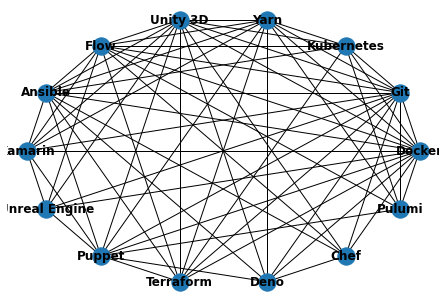

In [6]:
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
#labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [7]:
"""
La densidad de un grafo es una propiedad que determina la proporción de aristas que posee. 
Un grafo denso es un grafo en el que el número de aristas es cercano al número máximo de aristas posibles, es decir, 
a las que tendría si el grafo fuera completo.
#https://es.wikipedia.org/wiki/Densidad_(teor%C3%ADa_de_grafos)
"""
nx.density(G)

0.7142857142857143

In [23]:
from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['Ansible',
  'Deno',
  'Docker',
  'Flow',
  'Git',
  'Kubernetes',
  'Puppet',
  'Terraform',
  'Unity 3D',
  'Unreal Engine',
  'Xamarin',
  'Yarn'],
 ['Chef'],
 ['Pulumi']]

In [9]:
community.kernighan_lin_bisection(G)

({'Ansible', 'Docker', 'Git', 'Kubernetes', 'Unity 3D', 'Xamarin', 'Yarn'},
 {'Chef', 'Deno', 'Flow', 'Pulumi', 'Puppet', 'Terraform', 'Unreal Engine'})

In [33]:
nx.transitivity(G)

0.7577319587628866

In [36]:
nx.average_clustering(G)

0.8090806019377449

In [10]:
#PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links.
#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank
nx.pagerank(G)

{'Docker': 0.2592558512972482,
 'Git': 0.43196308021757285,
 'Kubernetes': 0.027467332402058762,
 'Yarn': 0.07204612234903382,
 'Unity 3D': 0.059778585476778535,
 'Flow': 0.015087174803109128,
 'Ansible': 0.021740125685075842,
 'Xamarin': 0.026695396221037473,
 'Unreal Engine': 0.01916590538646975,
 'Puppet': 0.0138156335925747,
 'Terraform': 0.01611527011632724,
 'Deno': 0.013269064498615079,
 'Chef': 0.012293648835515678,
 'Pulumi': 0.011306809118583052}

In [11]:
nx.degree(G)

DegreeView({'Docker': 13, 'Git': 13, 'Kubernetes': 8, 'Yarn': 11, 'Unity 3D': 12, 'Flow': 11, 'Ansible': 11, 'Xamarin': 8, 'Unreal Engine': 6, 'Puppet': 10, 'Terraform': 8, 'Deno': 7, 'Chef': 6, 'Pulumi': 6})

In [26]:
nx.degree_centrality(G)

{'Docker': 1.0,
 'Git': 1.0,
 'Kubernetes': 0.6153846153846154,
 'Yarn': 0.8461538461538463,
 'Unity 3D': 0.9230769230769231,
 'Flow': 0.8461538461538463,
 'Ansible': 0.8461538461538463,
 'Xamarin': 0.6153846153846154,
 'Unreal Engine': 0.46153846153846156,
 'Puppet': 0.7692307692307693,
 'Terraform': 0.6153846153846154,
 'Deno': 0.5384615384615385,
 'Chef': 0.46153846153846156,
 'Pulumi': 0.46153846153846156}

In [12]:
#Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph.
#https://neo4j.com/docs/graph-data-science/1.8/algorithms/betweenness-centrality/
nx.betweenness_centrality(G)

{'Docker': 0.0647028897028897,
 'Git': 0.0647028897028897,
 'Kubernetes': 0.00641025641025641,
 'Yarn': 0.02837810337810338,
 'Unity 3D': 0.04504477004477004,
 'Flow': 0.04349816849816849,
 'Ansible': 0.028591778591778593,
 'Xamarin': 0.005698005698005697,
 'Unreal Engine': 0.0014245014245014244,
 'Puppet': 0.031532356532356524,
 'Terraform': 0.003256003256003256,
 'Deno': 0.0047008547008547015,
 'Chef': 0.0021367521367521365,
 'Pulumi': 0.003256003256003256}

In [13]:
#Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph.
#https://neo4j.com/docs/graph-data-science/1.8/algorithms/closeness-centrality/
nx.closeness_centrality(G)

{'Docker': 1.0,
 'Git': 1.0,
 'Kubernetes': 0.7222222222222222,
 'Yarn': 0.8666666666666667,
 'Unity 3D': 0.9285714285714286,
 'Flow': 0.8666666666666667,
 'Ansible': 0.8666666666666667,
 'Xamarin': 0.7222222222222222,
 'Unreal Engine': 0.65,
 'Puppet': 0.8125,
 'Terraform': 0.7222222222222222,
 'Deno': 0.6842105263157895,
 'Chef': 0.65,
 'Pulumi': 0.65}

In [14]:
"""
Eigenvector Centrality is an algorithm that measures the transitive influence of nodes. 
Relationships originating from high-scoring nodes contribute more to the score of a node than connections from 
low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores.
"""
#https://neo4j.com/docs/graph-data-science/1.8/algorithms/eigenvector-centrality/
nx.eigenvector_centrality(G)

{'Docker': 0.33875468617304844,
 'Git': 0.33875468617304844,
 'Kubernetes': 0.23768412551521326,
 'Yarn': 0.30464636180267146,
 'Unity 3D': 0.3219021602061751,
 'Flow': 0.29405322894408364,
 'Ansible': 0.30485937678837194,
 'Xamarin': 0.24059036144708804,
 'Unreal Engine': 0.18419528294275006,
 'Puppet': 0.272489635054822,
 'Terraform': 0.24604402983954538,
 'Deno': 0.21063374882695887,
 'Chef': 0.18444125094443575,
 'Pulumi': 0.18213948717942752}

In [15]:
pesos = {}
for edge in G.edges():
    peso = G[edge[0]][edge[1]]['weight']
    pesos[edge] = peso
    
#pesos

In [16]:
degree=np.array([x[1] for x in G.degree()])
gradoMed=0
cont=0
for i in degree:
    gradoMed+=i
    cont+=1
gradoMed=gradoMed/cont
print(len(G.edges())/len(G.nodes()))
print("El grado medio es:",gradoMed)
print("El máximo grado es:",degree.max())
print("El mínimo grado es:",degree.min())

4.642857142857143
El grado medio es: 9.285714285714286
El máximo grado es: 13
El mínimo grado es: 6


Text(0.5, 1.0, 'degree distribution')

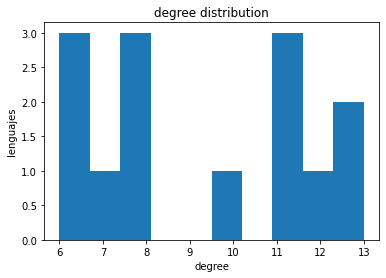

In [17]:
(n,x,p)=plt.hist(degree)
plt.xlabel('degree')
plt.ylabel('lenguajes')
plt.title('degree distribution')

In [18]:
def calculaModularidad(G, particion):
    valor = 0
    i=0
    lista = []
    for i in particion:
        for j in i:
            lista.append(j)
    
    if len(lista)==len(G.nodes()) and len(particion)==1:
        return 0
    elif len(lista) == 1:
        valor = -1/math.pow(2*len(G.edges()),2)
        suma=0
        for i in lista:
            suma+=math.pow(G.degree(i),2)
        return(suma*valor)
    else:
        suma=0
        x=0
        for i in particion:
            long=len(i)
            valA = long/len(G.edges())
            se = set()
            for j in i:
                se.add(j[0])
                se.add(j[1])
            
            su=0
            for s in se:
                su+=G.degree(s)
            valB=su/(2*len(G.edges()))
            
            valB = math.pow(valB,2)
            x = valA - valB
            suma+=x
        return suma

In [19]:
for nodo in G.nodes():
    print("La modularidad correspondiente al nodo", nodo ,"es:",calculaModularidad(G,[{nodo}]))

La modularidad correspondiente al nodo Docker es: -0.01
La modularidad correspondiente al nodo Git es: -0.01
La modularidad correspondiente al nodo Kubernetes es: -0.00378698224852071
La modularidad correspondiente al nodo Yarn es: -0.007159763313609468
La modularidad correspondiente al nodo Unity 3D es: -0.008520710059171597
La modularidad correspondiente al nodo Flow es: -0.007159763313609468
La modularidad correspondiente al nodo Ansible es: -0.007159763313609468
La modularidad correspondiente al nodo Xamarin es: -0.00378698224852071
La modularidad correspondiente al nodo Unreal Engine es: -0.0021301775147928993
La modularidad correspondiente al nodo Puppet es: -0.005917159763313609
La modularidad correspondiente al nodo Terraform es: -0.00378698224852071
La modularidad correspondiente al nodo Deno es: -0.0028994082840236688
La modularidad correspondiente al nodo Chef es: -0.0021301775147928993
La modularidad correspondiente al nodo Pulumi es: -0.0021301775147928993


In [ ]:
#https://programminghistorian.org/es/lecciones/crear-y-ver-archivos-html-con-python
#https://docs.python.org/es/3/library/webbrowser.html
#https://www.geeksforgeeks.org/creating-and-viewing-html-files-with-python/
#https://www.geeksforgeeks.org/how-to-write-to-an-html-file-in-python/
#https://pandas.pydata.org/docs/user_guide/index.html
#https://networkx.org/documentation/stable/tutorial.html
#https://www.ellaberintodefalken.com/2020/02/grafos-con-networkx.html //guardar grafos para no cargarlos desde 0
#https://www.codegrepper.com/code-examples/python/frameworks/file-path-in-python/networkx+draw+graph+with+weight //peso de los arcos

import webbrowser

f = open('holamundo.html','w')

mensaje = """<html>
<head>HEAD</head>
<body><p>Hola Mundo!</p></body>
</html>"""

mensaje2 = """<html>
<head>HEAD</head>
<body><p>Hola Mundo2!</p></body>
</html>"""

f.write(mensaje)
f.write(mensaje2)
f.close()

#webbrowser.open_new_tab('holamundo.html')